## 313 - Understanding Atmospheric Scale Height with Python and MetPy

[Youtube](https://www.youtube.com/watch?v=wdpPRRa1o3Q)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import metpy.calc as mpcalc

from metpy.units import units

In [2]:
mpcalc.scale_height(25 * units.degC, 10 * units.degC)

8507.528386606915 <Unit('meter')>

In [3]:
(25 + 10) / 2

17.5

In [4]:
1 / np.e

0.36787944117144233

In [5]:
def pressure_profile(top_height, scale_height, npts = 500, starting_pressure = 1013.25 * units.hPa):
    """
    Calcultates pressure profiles for heights, returns profile, heights and dz.
    """
    z = np.linspace(0, top_height, npts)
    return starting_pressure * np.exp(-z / scale_height), z, z[1] - z[0]

In [6]:
p, z, dz = pressure_profile(40 * units.km, 8.5 * units.km)

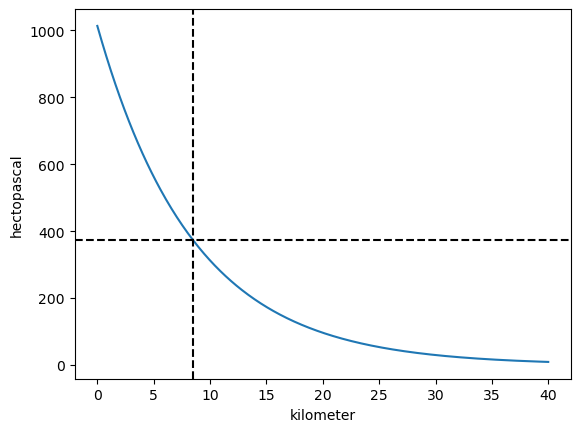

In [7]:
fig, ax = plt.subplots()
ax.plot(z, p)
ax.axhline(y = 1013.25 * units.hPa / np.e, color = 'black', linestyle = '--')
ax.axvline(x = 8.5 * units.km, color = 'black', linestyle = '--')

In [8]:
temperatures = np.arange(0, 24)
heights = mpcalc.scale_height(25 * units.degC, temperatures * units.degC)

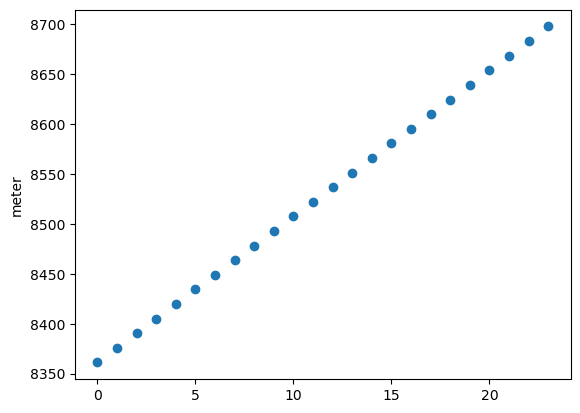

In [9]:
fig, ax = plt.subplots()
ax.scatter(temperatures, heights)